<a href="https://colab.research.google.com/github/shamsakhoja7-max/msba-portfolio-shamsakhoja/blob/main/TRUSOURCE_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

telco_df = pd.read_excel('/content/drive/MyDrive/Class - PA/retentiondata_case.xlsx')

Mounted at /content/drive


In [ ]:
telco_df.shape

(5636, 36)

In [ ]:
telco_df.columns

Index(['acct_ref', 'cust_ref', 'has_dependents', 'tenure_mo', 'home_phone',
       'multi_line', 'internet_plan', 'add_on_security', 'add_on_backup',
       'add_on_protection', 'tech_support_std', 'stream_tv', 'stream_movies',
       'contract_term', 'e_bill_opt_in', 'pay_method', 'monthly_fee',
       'total_billed', 'left_flag', 'fiscal_qtr', 'gender', 'age_years',
       'is_married', 'dependents_count', 'referred_friend', 'referrals_count',
       'recent_offer', 'avg_long_dist_fee', 'internet_tech', 'avg_gb_download',
       'premium_support', 'stream_music', 'unlimited_data_opt',
       'refunds_total', 'extra_data_fees_total', 'long_dist_fees_total'],
      dtype='object')

In [ ]:
#basic summary stats

telco_df.describe(include='all')

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total
count,5636,5636,5636,5636.000000,5636,5636,5636,5636,5636,5636,...,2530,5636.000000,4424,5636.000000,5636,5636,5636,5636.000000,5636.00000,5636.000000
unique,5621,5636,2,NaN,2,3,3,3,3,3,...,5,NaN,3,NaN,2,2,2,NaN,NaN,NaN
top,ACCT940714,CUST79440448,No,NaN,Yes,No,Fiber optic,No,No,No,...,Offer B,NaN,Fiber Optic,NaN,No,No,Yes,NaN,NaN,NaN
freq,2,1,3957,NaN,5079,2704,2479,2790,2469,2469,...,663,NaN,2435,NaN,3983,3665,3810,NaN,NaN,NaN
mean,NaN,NaN,NaN,32.445174,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.820859,NaN,20.400994,NaN,NaN,NaN,1.894514,7.01384,742.065994
std,NaN,NaN,NaN,24.515986,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.492059,NaN,20.252829,NaN,NaN,NaN,7.766096,25.48080,837.789207
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.00000,0.000000
25%,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.950000,NaN,4.000000,NaN,NaN,NaN,0.000000,0.00000,67.695000
50%,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.590000,NaN,17.000000,NaN,NaN,NaN,0.000000,0.00000,400.390000
75%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,36.322500,NaN,27.000000,NaN,NaN,NaN,0.000000,0.00000,1187.370000


In [ ]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5636 entries, 0 to 5635
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acct_ref               5636 non-null   object 
 1   cust_ref               5636 non-null   object 
 2   has_dependents         5636 non-null   object 
 3   tenure_mo              5636 non-null   int64  
 4   home_phone             5636 non-null   object 
 5   multi_line             5636 non-null   object 
 6   internet_plan          5636 non-null   object 
 7   add_on_security        5636 non-null   object 
 8   add_on_backup          5636 non-null   object 
 9   add_on_protection      5636 non-null   object 
 10  tech_support_std       5636 non-null   object 
 11  stream_tv              5636 non-null   object 
 12  stream_movies          5636 non-null   object 
 13  contract_term          5636 non-null   object 
 14  e_bill_opt_in          5636 non-null   object 
 15  pay_

In [ ]:
import pandas as pd

# Select numeric columns
numeric_cols = telco_df.select_dtypes(include=["int64", "float64"])

# Calculate variance
variances = numeric_cols.var()

# Zero-variance features
zero_var_features = variances[variances == 0].index.tolist()

zero_var_features


[]

In [ ]:
categorical_cols = telco_df.select_dtypes(include=["object", "category"])

near_zero_var = []

for col in categorical_cols:
    top_freq = telco_df[col].value_counts(normalize=True, dropna=False).iloc[0]
    if top_freq > 0.99:   # threshold can be 0.95–0.99
        near_zero_var.append(col)

near_zero_var


['fiscal_qtr']

In [ ]:
#check NA
telco_df.isna().sum().sort_values(ascending=False)

,0
recent_offer,3106
internet_tech,1212
total_billed,8
acct_ref,0
tenure_mo,0
has_dependents,0
cust_ref,0
home_phone,0
add_on_backup,0
add_on_protection,0


In [ ]:
missing_pct = (
    telco_df.isna()
      .mean()
      .mul(100)
      .round(2)
      .sort_values(ascending=False)
)

missing_pct

,0
recent_offer,55.11
internet_tech,21.50
total_billed,0.14
acct_ref,0.00
tenure_mo,0.00
has_dependents,0.00
cust_ref,0.00
home_phone,0.00
add_on_backup,0.00
add_on_protection,0.00


In [ ]:
# Handling Missing Values

if 'recent_offer' in telco_df.columns:
    telco_df['recent_offer'] = telco_df['recent_offer'].fillna('No offer')

if 'internet_tech' in telco_df.columns:
    telco_df['internet_tech'] = telco_df['internet_tech'].fillna('Unknown')

if 'total_billed' in telco_df.columns:
    telco_df['total_billed']= telco_df['total_billed'].fillna(telco_df['total_billed'].median())


# Verify missing values are handled
telco_df.isna().sum().sort_values(ascending=False)


,0
acct_ref,0
cust_ref,0
has_dependents,0
tenure_mo,0
home_phone,0
multi_line,0
internet_plan,0
add_on_security,0
add_on_backup,0
add_on_protection,0


In [ ]:
#check duplicates

telco_df.duplicated().sum()

np.int64(0)

In [ ]:
#Response Variable Distribution

telco_df['left_flag'].value_counts()


,count
left_flag,
No,4140
Yes,1496


In [ ]:
#Response Variable Distribution %

telco_df['left_flag'].value_counts(normalize=True).round(2)


,proportion
left_flag,
No,0.73
Yes,0.27


In [ ]:
churn_table = (
    telco_df["left_flag"]
    .value_counts()
    .to_frame(name="count")
)

churn_table["percent"] = (
    churn_table["count"] / churn_table["count"].sum() * 100
)

churn_table.round(1)


,count,percent
left_flag,,
No,4140,73.5
Yes,1496,26.5


In [ ]:
#checking for inconsistencies, negative values or invalid/ impossible values


telco_df.describe()

,tenure_mo,monthly_fee,total_billed,age_years,dependents_count,referrals_count,avg_long_dist_fee,avg_gb_download,refunds_total,extra_data_fees_total,long_dist_fees_total
count,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.00000,5636.000000
mean,32.445174,64.784031,2288.618923,46.680092,0.464869,1.956707,22.820859,20.400994,1.894514,7.01384,742.065994
std,24.515986,30.064922,2264.202978,16.754494,0.958041,3.012469,15.492059,20.252829,7.766096,25.48080,837.789207
min,0.000000,18.250000,18.800000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,9.000000,35.750000,406.637500,33.000000,0.000000,0.000000,8.950000,4.000000,0.000000,0.00000,67.695000
50%,29.000000,70.300000,1412.150000,46.000000,0.000000,0.000000,22.590000,17.000000,0.000000,0.00000,400.390000
75%,55.000000,89.900000,3802.375000,60.000000,0.000000,3.000000,36.322500,27.000000,0.000000,0.00000,1187.370000
max,72.000000,118.750000,8684.800000,80.000000,9.000000,11.000000,49.990000,85.000000,49.790000,150.00000,3564.720000


Customers who opt into e-billing are significantly more likely to churn.

This does NOT mean e-billing causes churn — it means:

E-bill opt-in is a strong churn indicator

In [ ]:
#impact of e-bill opt in


# 1) Clean / standardize the yes-no flag
telco_df["e_bill_opt_in"] = (
    telco_df["e_bill_opt_in"]
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({"y":"yes", "n":"no", "true":"yes", "false":"no", "1":"yes", "0":"no"})
)

# keep only Yes/No (drop/ignore Unknowns if they exist)
df2 = telco_df[telco_df["e_bill_opt_in"].isin(["yes", "no"])].copy()

# 2) Churn rate by e-bill opt-in (counts + rates)
impact = (
    df2.groupby("e_bill_opt_in")["left_flag"]
       .agg(n="size", churn_rate=lambda s: (s == "Yes").mean())
       .reset_index()
)

# 3) Simple lift vs "no" as baseline
base = impact.loc[impact["e_bill_opt_in"].eq("no"), "churn_rate"].iloc[0]
impact["abs_lift_vs_no"] = impact["churn_rate"] - base
impact["rel_lift_vs_no"] = (impact["churn_rate"] / base - 1)

impact.sort_values("e_bill_opt_in")


,e_bill_opt_in,n,churn_rate,abs_lift_vs_no,rel_lift_vs_no
0,no,2279,0.168934,0.000000,0.000000
1,yes,3357,0.330950,0.162017,0.959054


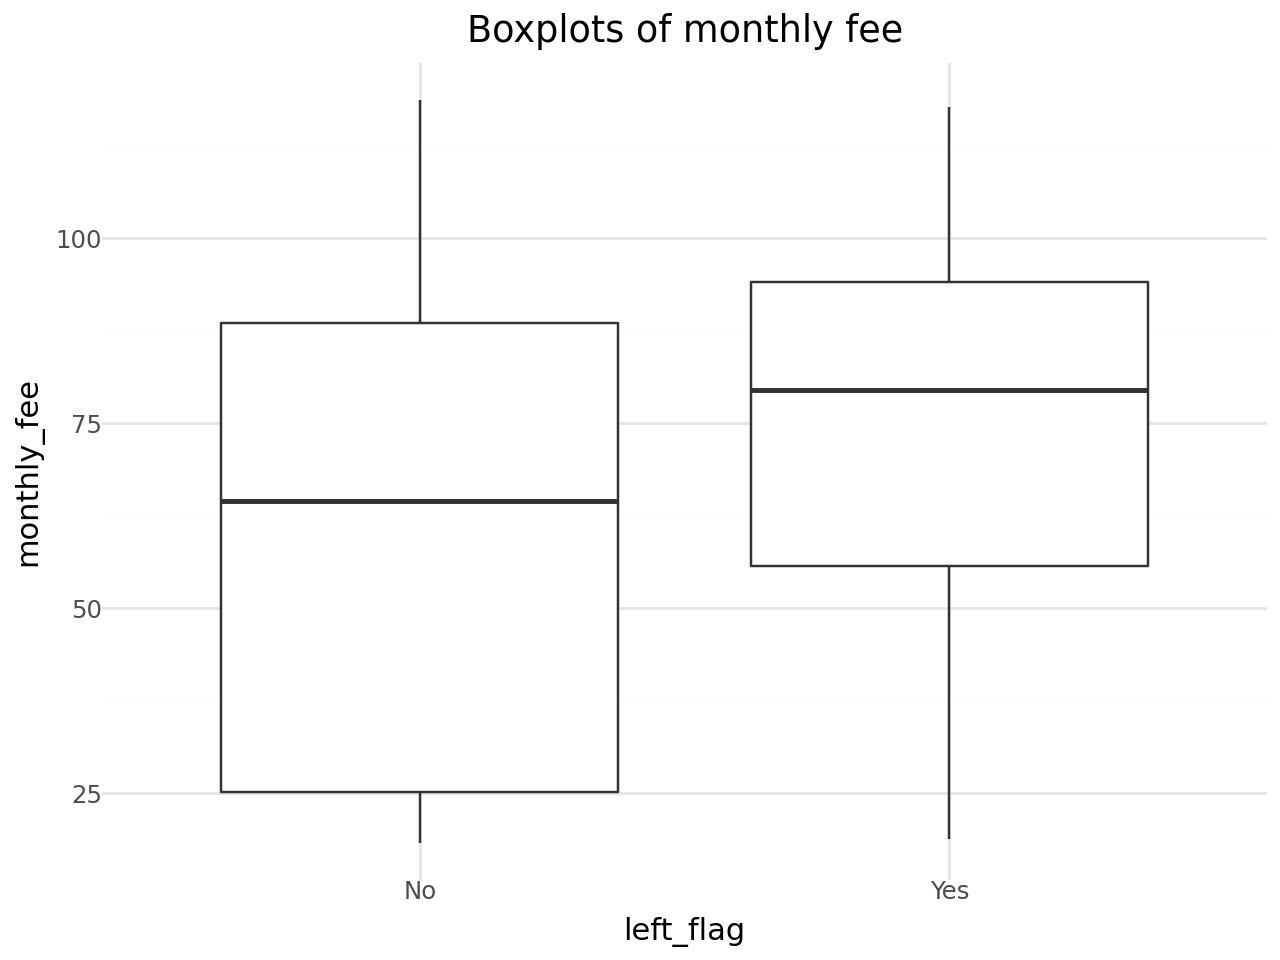

In [ ]:
#checking outliers in key variables

from plotnine import *

# Boxplot
(
    ggplot(telco_df, aes(x="left_flag", y="monthly_fee")) +
    geom_boxplot() +
    labs(
        title="Boxplots of monthly fee",
        x="left_flag",
        y="monthly_fee"
    ) +
    theme_minimal()
)

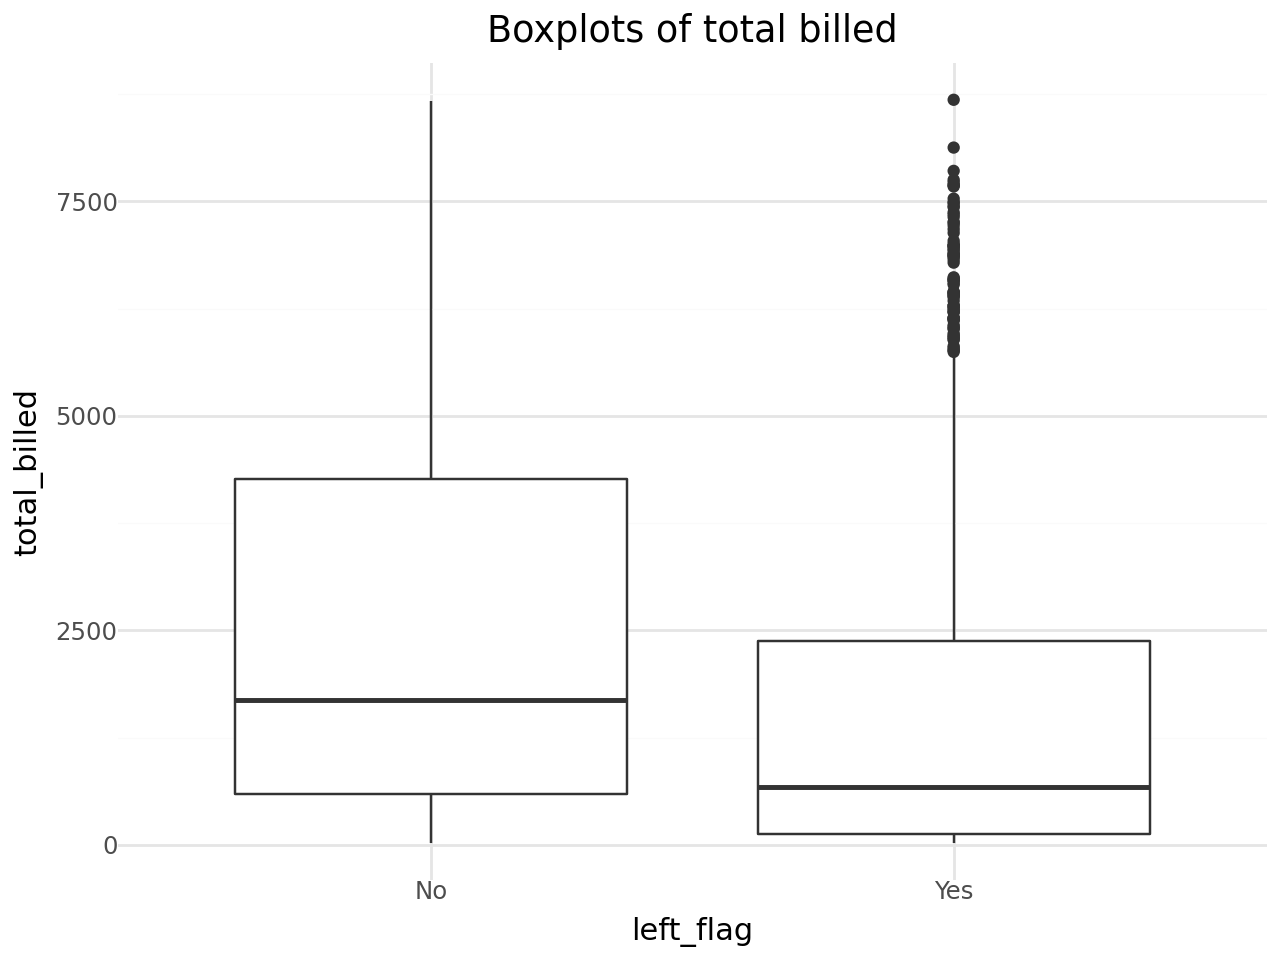

In [ ]:
# Boxplot
(
    ggplot(telco_df, aes(x="left_flag", y="total_billed")) +
    geom_boxplot() +
    labs(
        title="Boxplots of total billed",
        x="left_flag",
        y="total_billed"
    ) +
    theme_minimal()
)

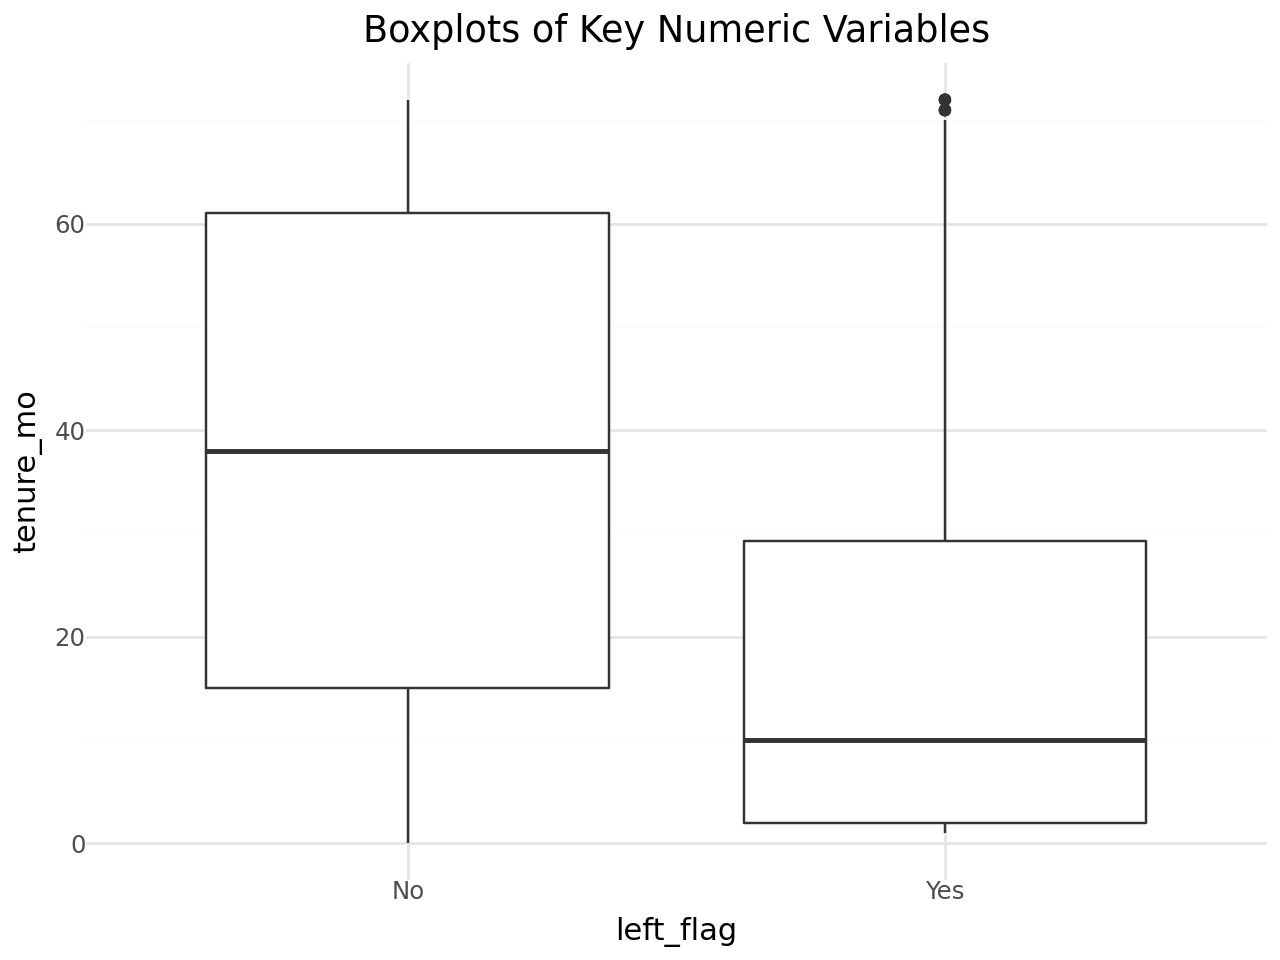

In [ ]:
# Boxplot
(
    ggplot(telco_df, aes(x="left_flag", y="tenure_mo")) +
    geom_boxplot() +
    labs(
        title="Boxplots of Key Numeric Variables",
        x="left_flag",
        y="tenure_mo"
    ) +
    theme_minimal()
)

Examination of Missing Values, Outliers, and Inconsistencies

The dataset was examined for missing values, duplicates, outliers, and logical inconsistencies. A small number of missing values were identified in a few variables. Categorical fields such as recent_offer and internet_tech contained missing values, which were interpreted as meaningful absence (e.g., no offer or no internet service) and were imputed accordingly. A very small number of missing values in the numeric variable total_billed were imputed using the median. After treatment, no missing values remained.

The dataset contained no duplicate records. Summary statistics and boxplots were used to assess outliers and inconsistencies. Numeric variables showed some right-skewed distributions and zero-inflation, particularly in billing and usage fields; however, all values were within plausible ranges and no negative or logically invalid values were observed. Outliers identified in boxplots represent valid customer behavior rather than data errors and were retained.



In [ ]:
telco_df.head()

,acct_ref,cust_ref,has_dependents,tenure_mo,home_phone,multi_line,internet_plan,add_on_security,add_on_backup,add_on_protection,...,recent_offer,avg_long_dist_fee,internet_tech,avg_gb_download,premium_support,stream_music,unlimited_data_opt,refunds_total,extra_data_fees_total,long_dist_fees_total
0,ACCT329751,CUST87480485,No,28,Yes,No,No,No internet service,No internet service,No internet service,...,Offer C,40.39,Unknown,0,No,No,No,0.0,0,1130.92
1,ACCT587418,CUST90091856,No,59,Yes,No,No,No internet service,No internet service,No internet service,...,Offer B,26.99,Unknown,0,No,No,No,0.0,0,1592.41
2,ACCT329215,CUST50756105,No,36,Yes,No,No,No internet service,No internet service,No internet service,...,Offer C,8.50,Unknown,0,No,No,No,0.0,0,306.00
3,ACCT537348,CUST17757718,No,53,Yes,No,No,No internet service,No internet service,No internet service,...,Offer B,10.32,Unknown,0,No,No,No,0.0,0,546.96
4,ACCT811407,CUST61267619,Yes,25,Yes,No,No,No internet service,No internet service,No internet service,...,Offer C,2.82,Unknown,0,No,No,No,0.0,0,70.50


In [ ]:
telco_df.describe()

,tenure_mo,monthly_fee,total_billed,age_years,dependents_count,referrals_count,avg_long_dist_fee,avg_gb_download,refunds_total,extra_data_fees_total,long_dist_fees_total
count,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.000000,5636.00000,5636.000000
mean,32.445174,64.784031,2288.618923,46.680092,0.464869,1.956707,22.820859,20.400994,1.894514,7.01384,742.065994
std,24.515986,30.064922,2264.202978,16.754494,0.958041,3.012469,15.492059,20.252829,7.766096,25.48080,837.789207
min,0.000000,18.250000,18.800000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,9.000000,35.750000,406.637500,33.000000,0.000000,0.000000,8.950000,4.000000,0.000000,0.00000,67.695000
50%,29.000000,70.300000,1412.150000,46.000000,0.000000,0.000000,22.590000,17.000000,0.000000,0.00000,400.390000
75%,55.000000,89.900000,3802.375000,60.000000,0.000000,3.000000,36.322500,27.000000,0.000000,0.00000,1187.370000
max,72.000000,118.750000,8684.800000,80.000000,9.000000,11.000000,49.990000,85.000000,49.790000,150.00000,3564.720000


In [ ]:

import numpy as np

# Define bin edges: 0 to 75 in steps of 3
bins = np.arange(0, 76, 3)

labels = [
    "0-2 months", "3-5 months", "6-8 months", "9-11 months",
    "12-14 months", "15-17 months", "18-20 months", "21-23 months",
    "24-26 months", "27-29 months", "30-32 months", "33-35 months",
    "36-38 months", "39-41 months", "42-44 months", "45-47 months",
    "48-50 months", "51-53 months", "54-56 months", "57-59 months",
    "60-62 months", "63-65 months", "66-68 months", "69-71 months",
    "72-74 months"
]

telco_df["tenure_grouped"] = pd.cut(
    telco_df["tenure_mo"],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)


tenure_churn_table = (
    telco_df
    .groupby(["tenure_grouped", "left_flag"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

tenure_churn_table["pct_yes"] = (
    tenure_churn_table["Yes"] /
    (tenure_churn_table["Yes"] + tenure_churn_table["No"])
).round(3)


tenure_churn_table = tenure_churn_table.sort_values(
    by="pct_yes",
    ascending=False
)

tenure_churn_table


/tmp/ipython-input-3092448462.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


left_flag,tenure_grouped,No,Yes,pct_yes
0,0-2 months,373,479,0.562
1,3-5 months,179,151,0.458
2,6-8 months,184,110,0.374
4,12-14 months,150,77,0.339
3,9-11 months,175,88,0.335
5,15-17 months,153,60,0.282
6,18-20 months,121,46,0.275
10,30-32 months,117,42,0.264
7,21-23 months,158,49,0.237
9,27-29 months,128,39,0.234


# Churn is an early lifecycle problem. Drops from 56% in first 3 months to 37% after 6 months.

Purpose: This chart shows how customer churn rates change over time as tenure increases.

So what? Churn is highest in the earliest tenure period (0–2 months) and declines steadily as customers remain longer with the company, indicating that new customers are far more likely to leave than established ones. After roughly the first year, churn stabilizes at much lower levels, suggesting customers who stay past early tenure are increasingly loyal.

Business takeaway: The company should focus retention efforts on the first few months of the customer lifecycle, where churn risk is highest. Improving onboarding, expectation-setting, and early customer support can significantly reduce churn and improve long-term customer retention.

/usr/local/lib/python3.12/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


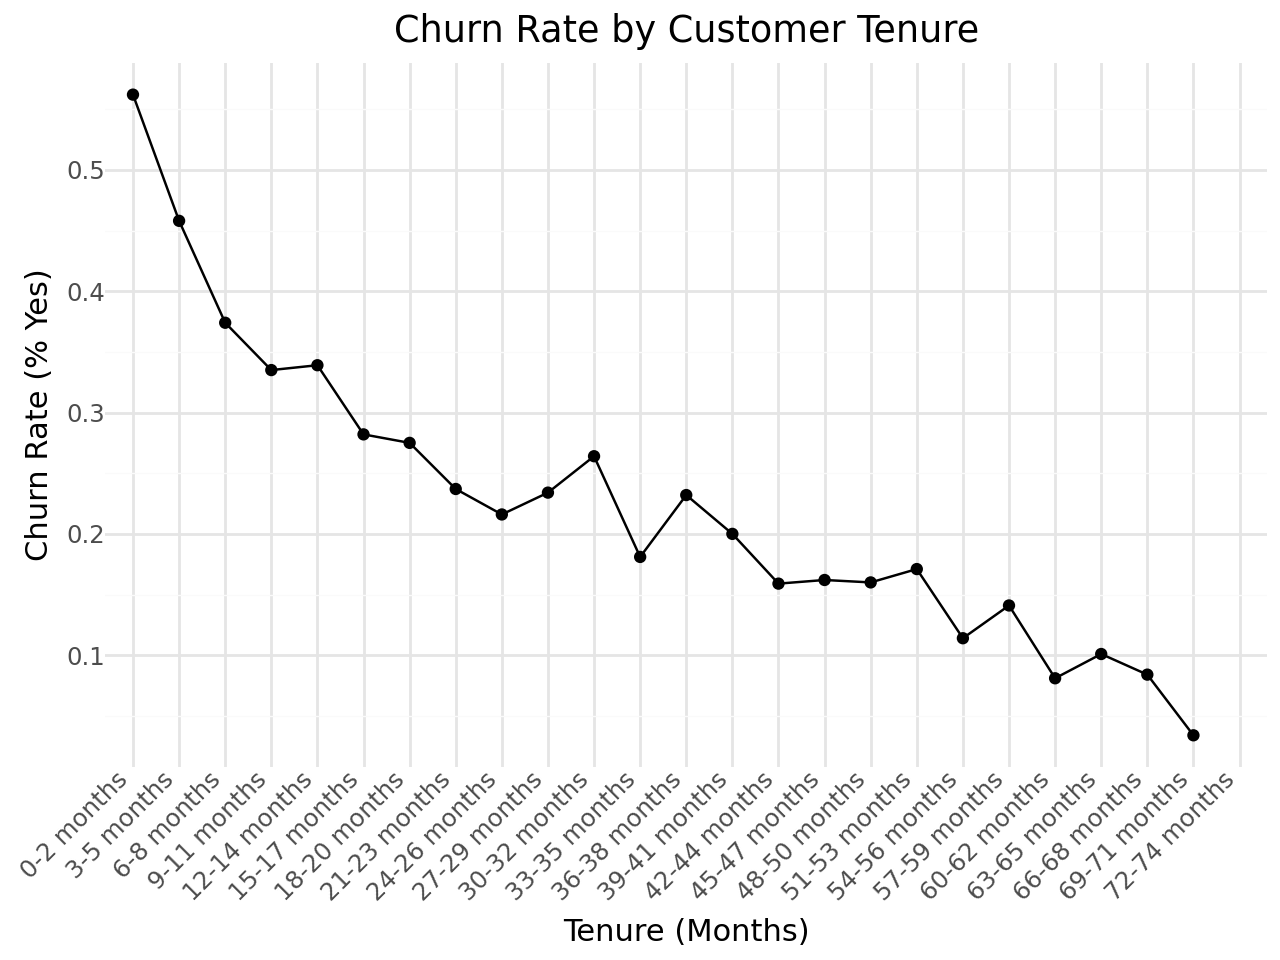

In [ ]:
from plotnine import *

(
    ggplot(tenure_churn_table,
           aes(x="tenure_grouped", y="pct_yes", group=1)) +
    geom_line() +
    geom_point() +
    labs(
        title="Churn Rate by Customer Tenure",
        x="Tenure (Months)",
        y="Churn Rate (% Yes)"
    ) +
    theme_minimal() +
    theme(
        axis_text_x=element_text(rotation=45, ha="right")
    )
)


# In the first 6-8 months, customers with Premium Support churn significantly less than those without it, indicating Premium Support can be a good retention strategy during early onboarding. We see a 10 -15% improvement

Purpose: This chart shows how churn rates evolve across customer tenure, comparing customers with and without premium support.

So what? Churn is highest in the early months and steadily declines as tenure increases, but customers without premium support consistently exhibit higher churn across most tenure groups. While churn for both groups converges at very long tenure, the gap is most pronounced in the first 12–24 months, where premium support appears to reduce churn meaningfully.

Business takeaway: Offering or bundling premium support during the early customer lifecycle can significantly reduce early churn. Targeting new customers with premium support trials may improve retention and increase long-term customer value.

/tmp/ipython-input-891430602.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.12/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


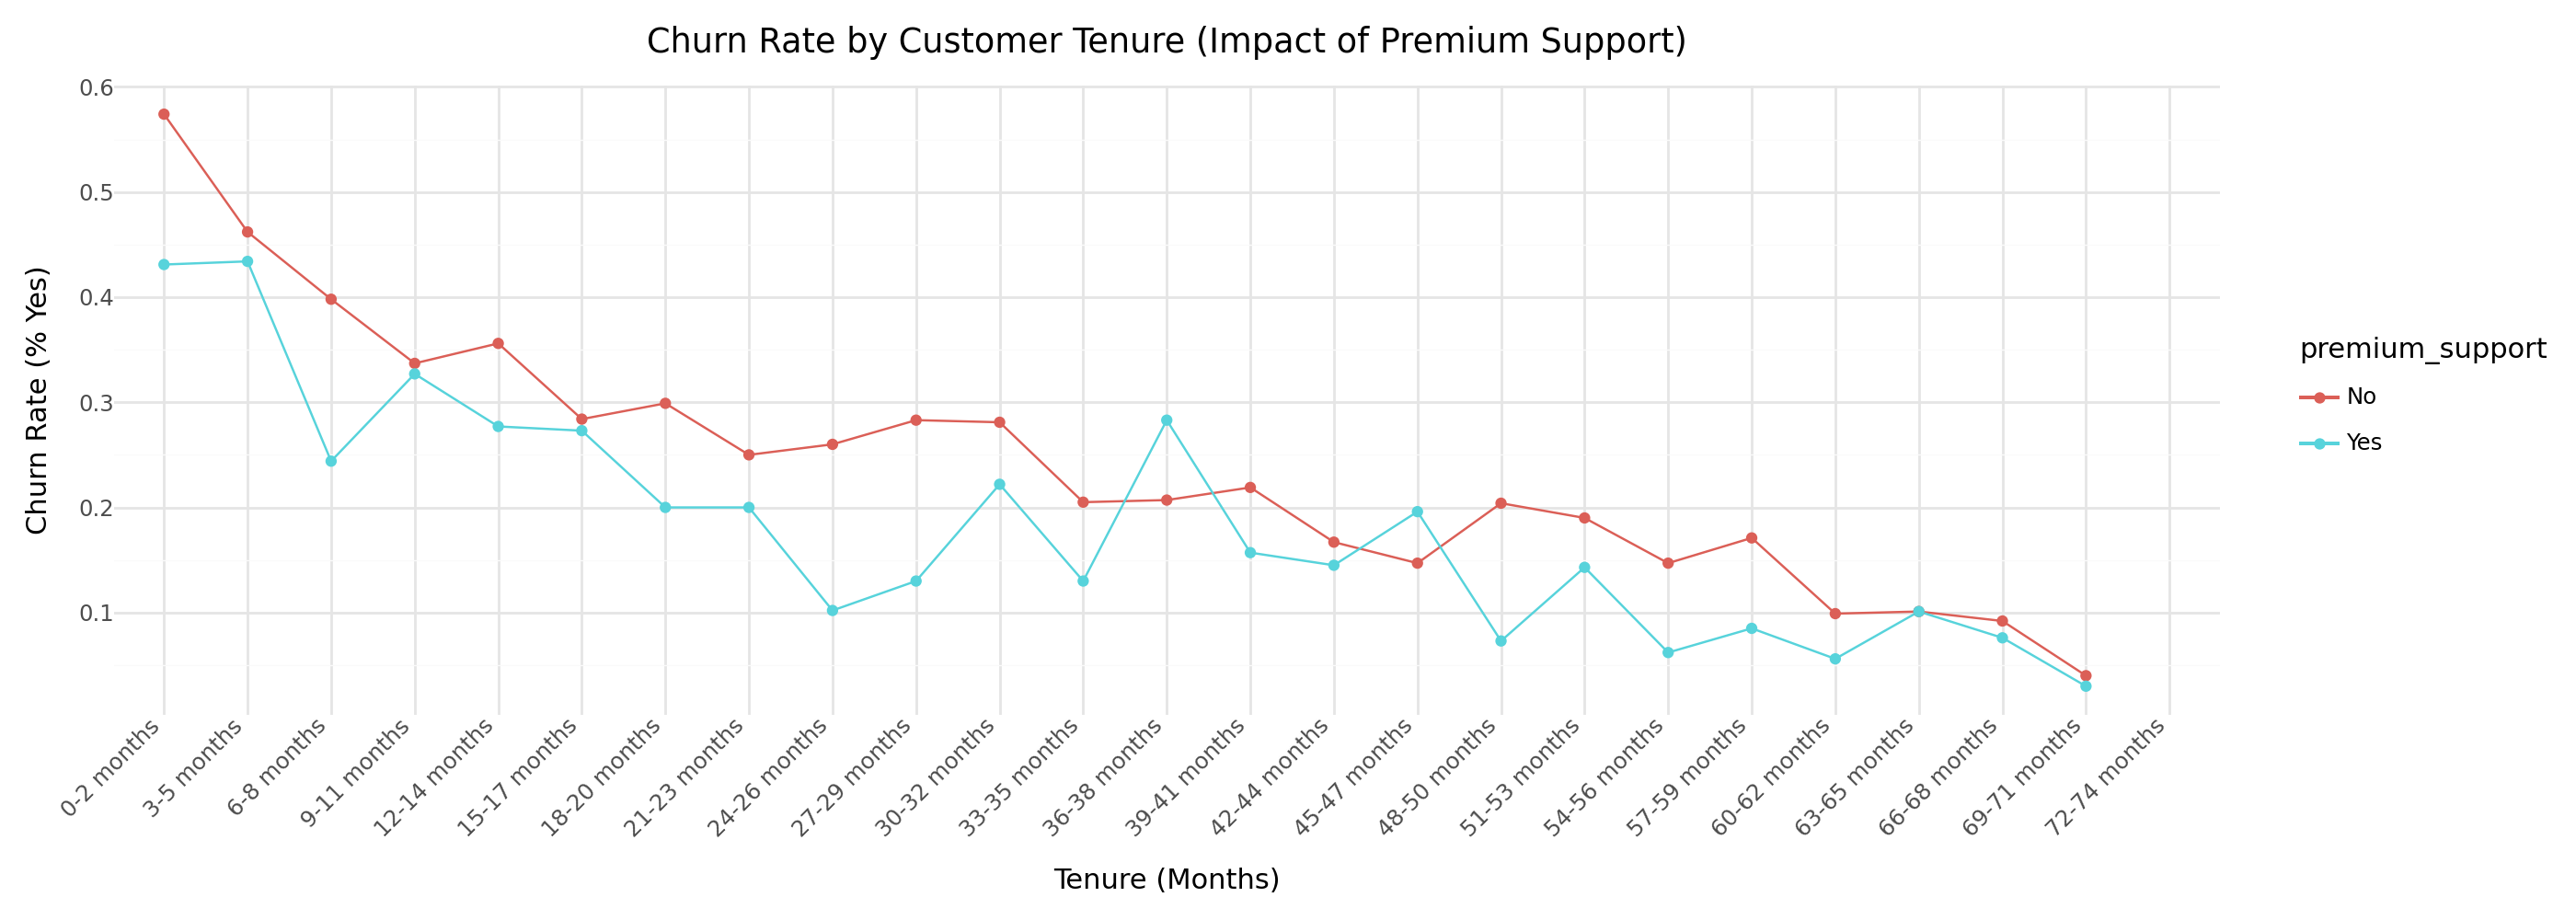

In [ ]:
from plotnine import *

# Build churn table WITH premium_support
tenure_churn_premium = (
    telco_df
    .groupby(["tenure_grouped", "premium_support", "left_flag"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

tenure_churn_premium["pct_yes"] = (
    tenure_churn_premium["Yes"] /
    (tenure_churn_premium["Yes"] + tenure_churn_premium["No"])
).round(3)


(
    ggplot(
        tenure_churn_premium,
        aes(x="tenure_grouped", y="pct_yes", color="premium_support",
            group="premium_support")
    ) +
    geom_line() +
    geom_point() +
    labs(
        title="Churn Rate by Customer Tenure (Impact of Premium Support)",
        x="Tenure (Months)",
        y="Churn Rate (% Yes)"
    ) +
    theme_minimal() +
    theme(
        figure_size= (14, 5), axis_text_x=element_text(rotation=45, ha="right")
    )
)


# Customers using Fiber Optic are at highest churn risk especially first 6-8 months with churn rate as high as 60-70%. Comparitively DSL users are at 20% and cable users are at 30% when they have passed 6-8 months with the company.

Purpose: This chart shows how churn rates evolve across customer tenure, segmented by internet technology type.

So what? Churn is highest in the early tenure periods for all technologies but is consistently highest for Fiber Optic customers, followed by Cable and DSL. While churn declines with tenure across all technologies, Fiber customers maintain elevated churn even at longer tenures, suggesting higher expectations or sensitivity to service quality.

Business takeaway: Retention efforts should be concentrated in the first year of tenure, with technology-specific strategies, particularly for Fiber Optic customers. Improving service reliability, onboarding, and targeted offers for Fiber users may significantly reduce churn and improve long-term customer value.

/tmp/ipython-input-2609001914.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
/usr/local/lib/python3.12/dist-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/usr/local/lib/python3.12/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 4 rows containing missing values.


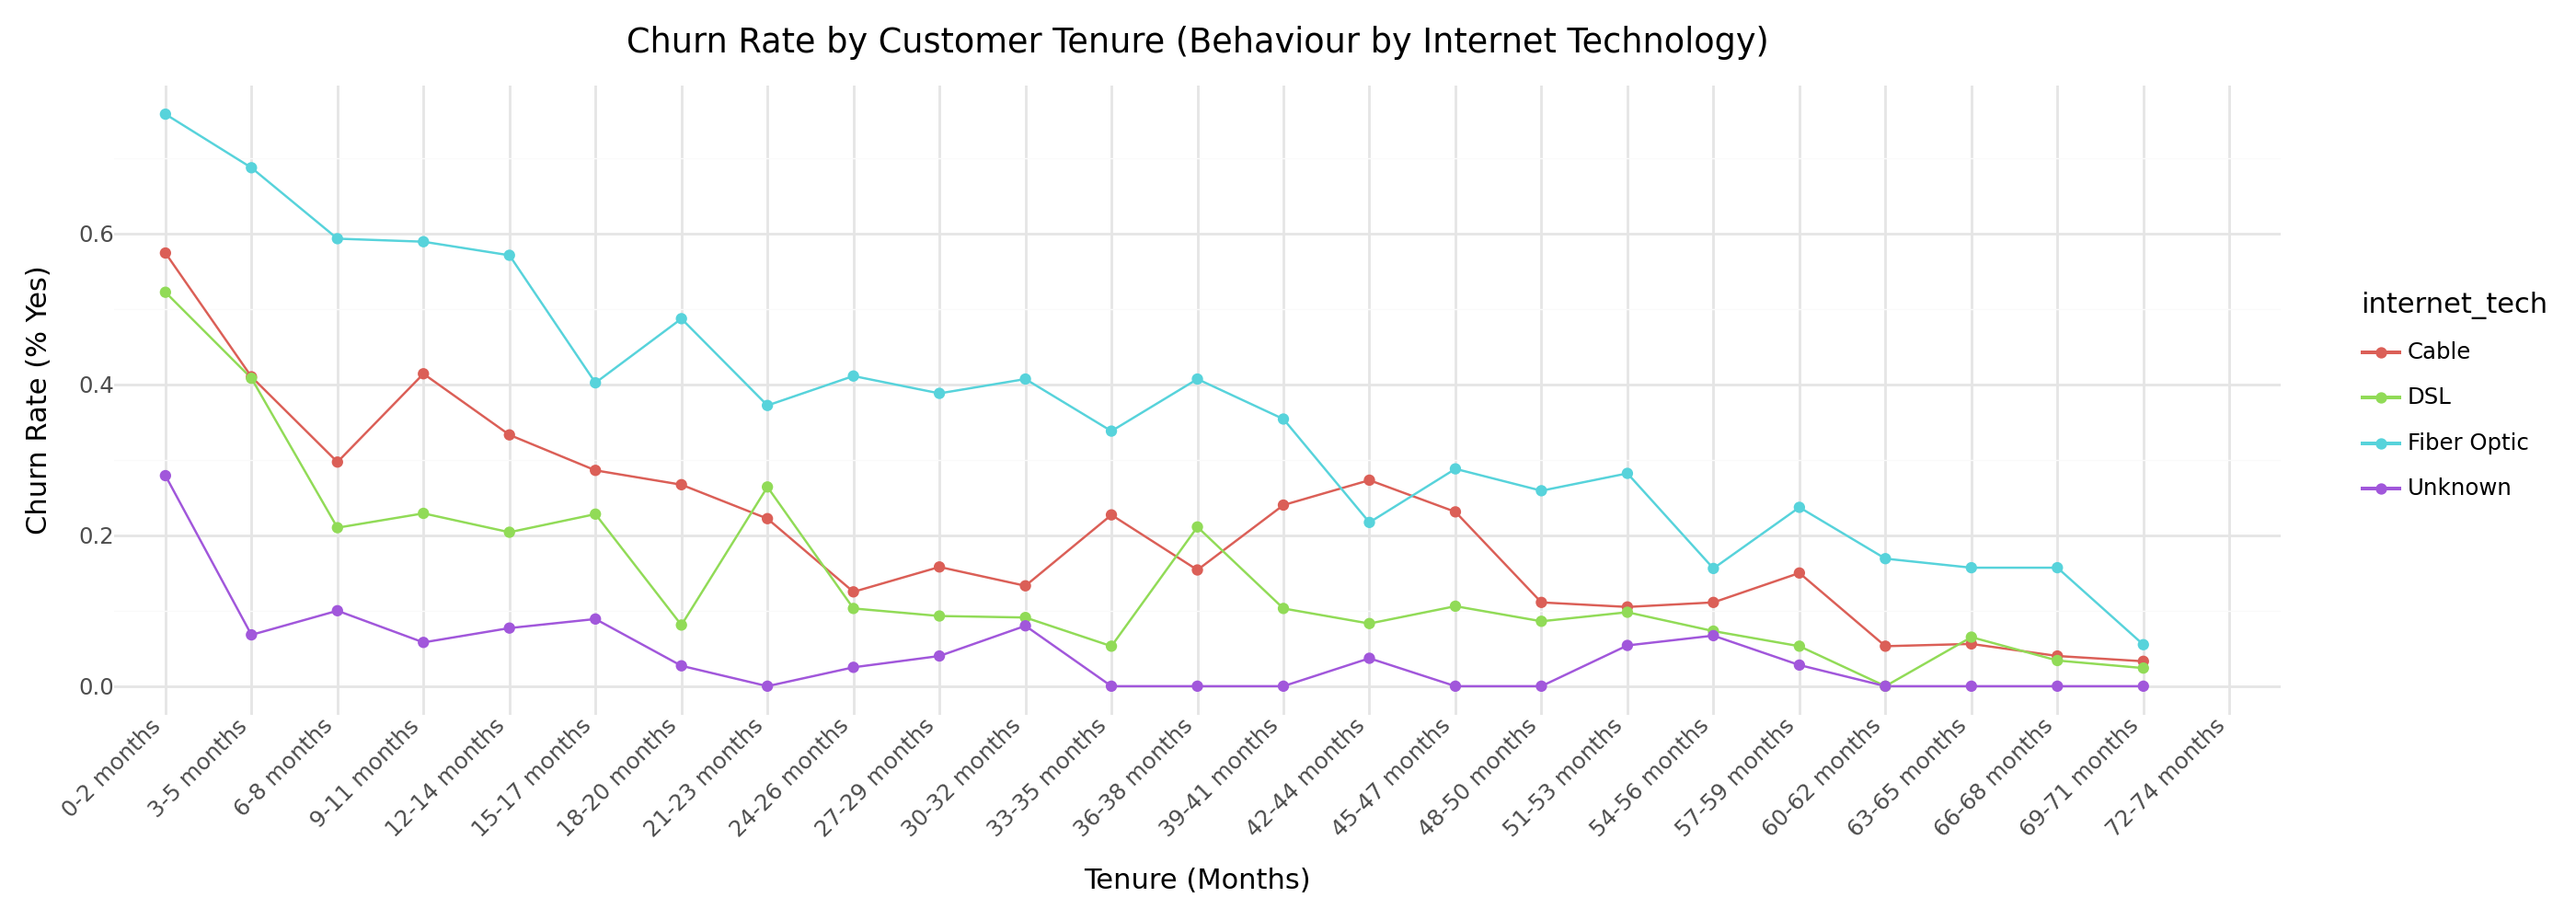

In [ ]:
from plotnine import *

# Build churn table WITH internet_tech
tenure_churn_tech = (
    telco_df
    .groupby(["tenure_grouped", "internet_tech", "left_flag"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

tenure_churn_tech["pct_yes"] = (
    tenure_churn_tech["Yes"] /
    (tenure_churn_tech["Yes"] + tenure_churn_tech["No"])
).round(3)


(
    ggplot(
        tenure_churn_tech,
        aes(x="tenure_grouped", y="pct_yes", color = "internet_tech", group = "internet_tech" )
    ) +
    geom_line() +
    geom_point() +
        labs(
        title="Churn Rate by Customer Tenure (Behaviour by Internet Technology)",
        x="Tenure (Months)",
        y="Churn Rate (% Yes)"
    ) +
    theme_minimal() +
    theme(
        figure_size=(14, 5),
        axis_text_x=element_text(rotation=45, ha="right")
    )
)


# Customer personas who have dependents have an overall low churn rate through out the the lifecycle. Customers with dependents have 10% - 20% better retention. Telco can give special FNF Acquisition offers to acquire these groups.

/tmp/ipython-input-3260811748.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


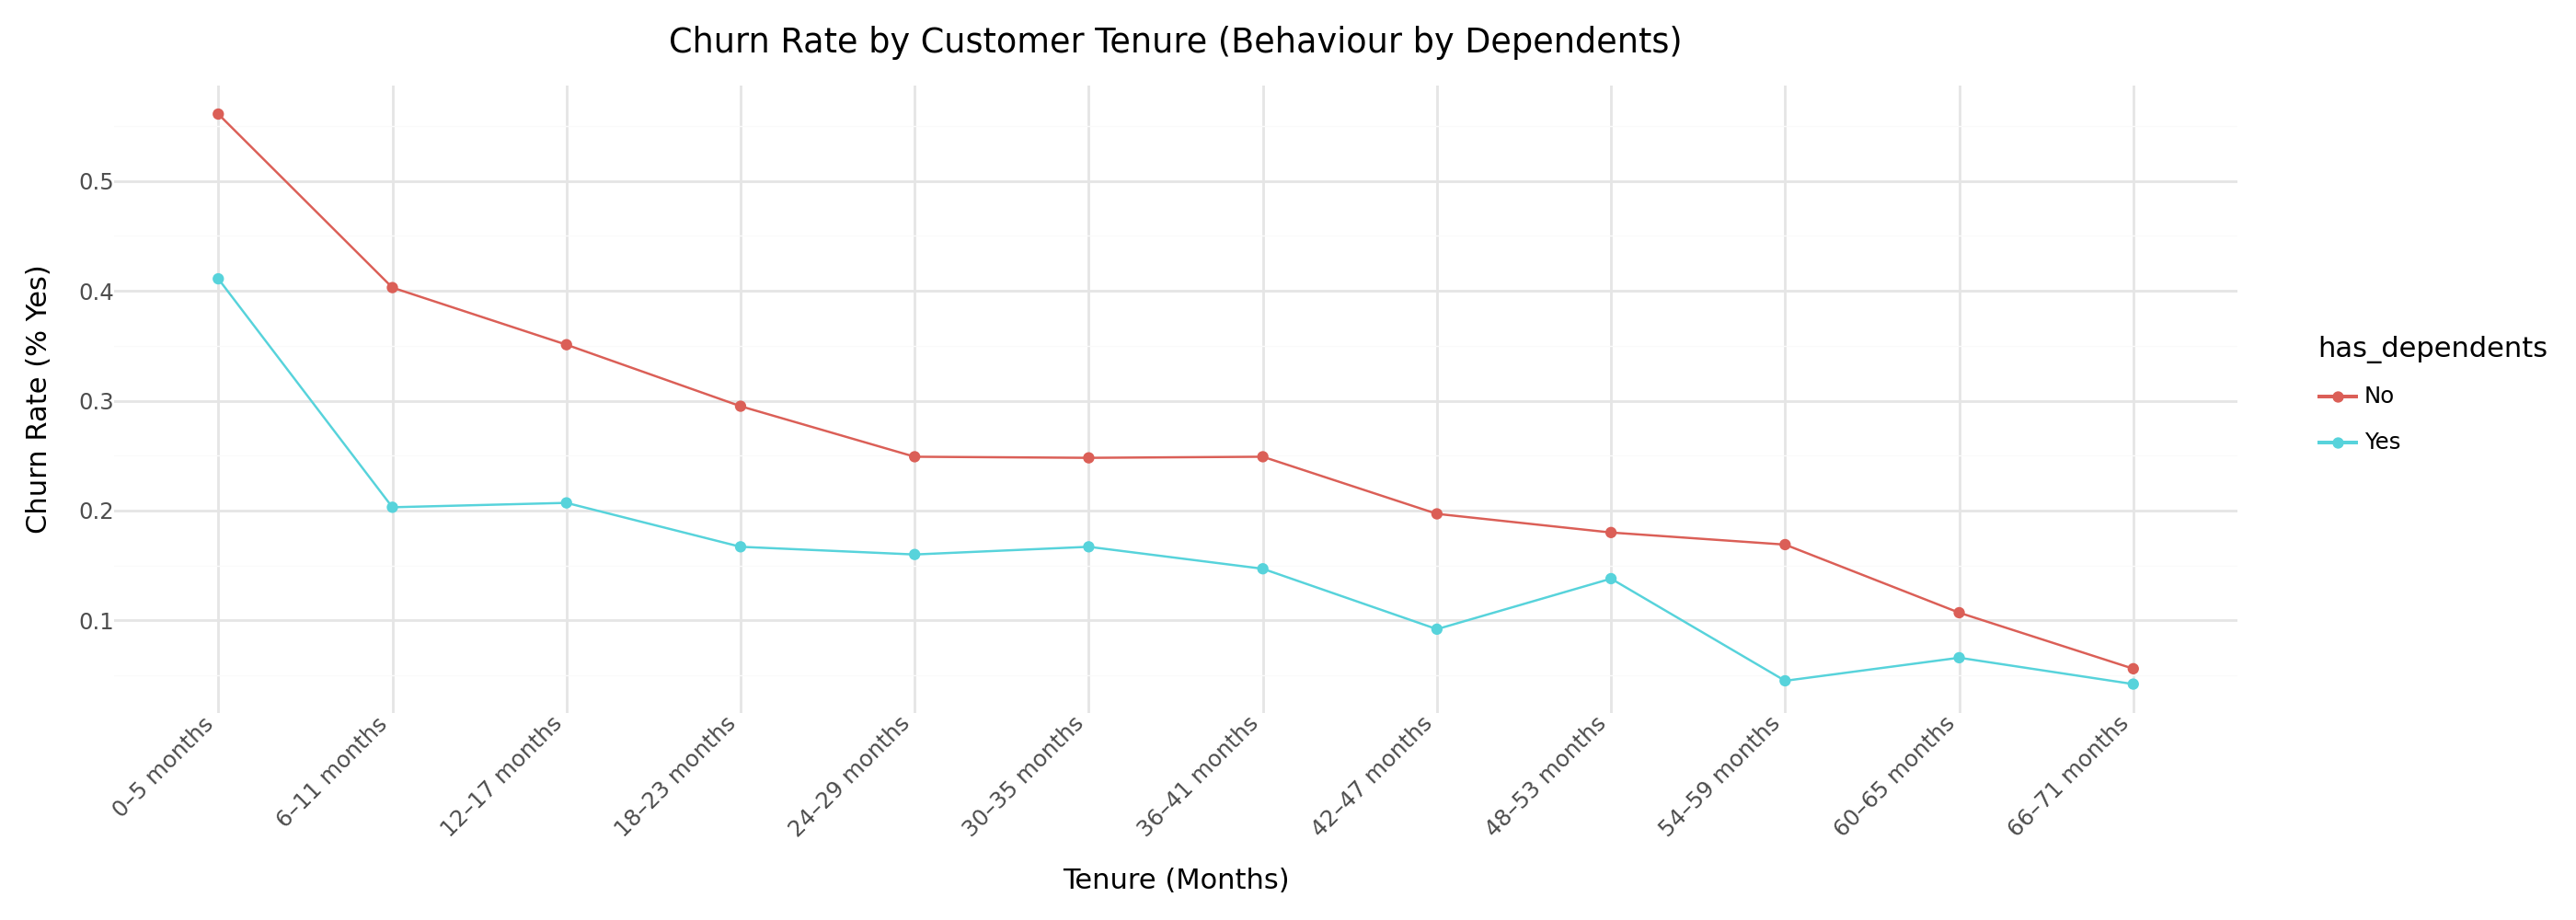

In [ ]:



import numpy as np

# Define bin edges: 0 to 75 in steps of 3
bins = np.arange(0, 76, 6)

labels = [
    "0–5 months", "6–11 months", "12–17 months", "18–23 months",
    "24–29 months", "30–35 months", "36–41 months", "42–47 months",
    "48–53 months", "54–59 months", "60–65 months", "66–71 months"]

telco_df["tenure_grouped"] = pd.cut(
    telco_df["tenure_mo"],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)


from plotnine import *

# Build churn table WITH has_dependents
tenure_churn_dependents = (
    telco_df
    .groupby(["tenure_grouped", "has_dependents", "left_flag"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

tenure_churn_dependents["pct_yes"] = (
    tenure_churn_dependents["Yes"] /
    (tenure_churn_dependents["Yes"] + tenure_churn_dependents["No"])
).round(3)


(
    ggplot(
      tenure_churn_dependents,
        aes(x="tenure_grouped", y="pct_yes", color = "has_dependents", group = "has_dependents" )
    ) +
    geom_line() +
    geom_point() +
        labs(
        title="Churn Rate by Customer Tenure (Behaviour by Dependents)",
        x="Tenure (Months)",
        y="Churn Rate (% Yes)"
    ) +
    theme_minimal() +
    theme(
        figure_size=(14, 5),
        axis_text_x=element_text(rotation=45, ha="right")
    )
)

Purpose: This chart shows how churn rates change across customer tenure, comparing customers with and without dependents.

So what? Churn is highest in the first 0–5 months and steadily declines as tenure increases, indicating early tenure is the most vulnerable period. Across all tenure groups, customers without dependents consistently churn at higher rates than those with dependents, suggesting greater stability among customers with family ties.

Business takeaway: The company should prioritize retention efforts during the first six months, particularly for customers without dependents. Strengthening onboarding and early engagement can significantly reduce early churn and improve long-term customer retention.

In [ ]:
telco_df.columns

Index(['acct_ref', 'cust_ref', 'has_dependents', 'tenure_mo', 'home_phone',
       'multi_line', 'internet_plan', 'add_on_security', 'add_on_backup',
       'add_on_protection', 'tech_support_std', 'stream_tv', 'stream_movies',
       'contract_term', 'e_bill_opt_in', 'pay_method', 'monthly_fee',
       'total_billed', 'left_flag', 'fiscal_qtr', 'gender', 'age_years',
       'is_married', 'dependents_count', 'referred_friend', 'referrals_count',
       'recent_offer', 'avg_long_dist_fee', 'internet_tech', 'avg_gb_download',
       'premium_support', 'stream_music', 'unlimited_data_opt',
       'refunds_total', 'extra_data_fees_total', 'long_dist_fees_total',
       'tenure_grouped'],
      dtype='object')

# No offer control group shows that only offer A and B are effective in churn reduction. Re-evaluate all other offers.

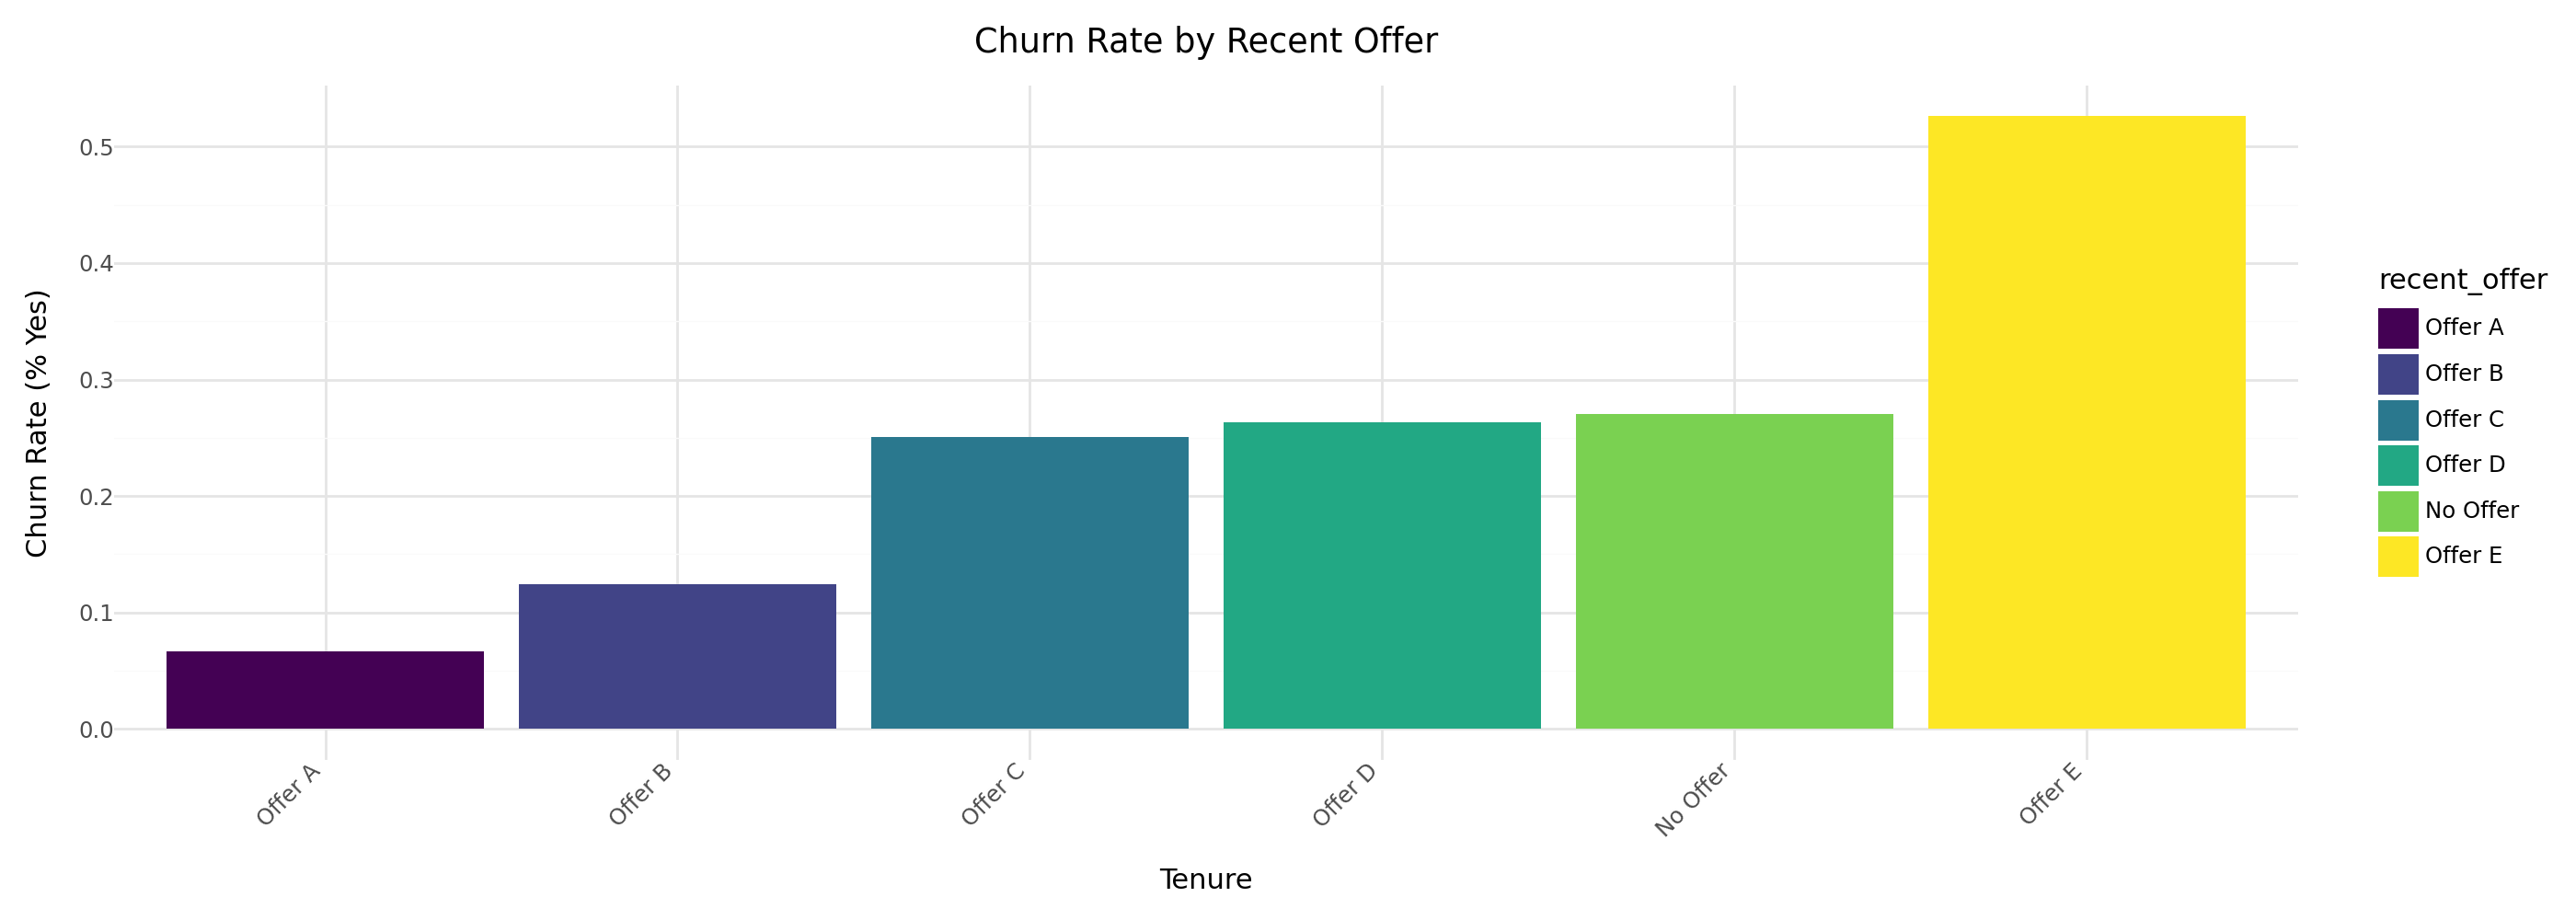

In [ ]:
# Churn analysis by recent offer (

telco_df['recent_offer'] = (
    telco_df['recent_offer']
    .fillna('No Offer')
    .str.strip()
    .str.title()
)


offer_churn_table = (
    telco_df
    .groupby(["recent_offer", "left_flag"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)


offer_churn_table["pct_yes"] = (
    offer_churn_table["Yes"] /
    (offer_churn_table["Yes"] + offer_churn_table["No"])
).round(3)


#SORT BY CHURN RATE (ASCENDING)
offer_churn_table = offer_churn_table.sort_values("pct_yes", ascending=True)

# LOCK X-AXIS ORDER TO SORTED VALUES
offer_churn_table["recent_offer"] = pd.Categorical(
    offer_churn_table["recent_offer"],
    categories=offer_churn_table["recent_offer"],
    ordered=True
)

offer_churn_table = offer_churn_table.sort_values("recent_offer")

(
    ggplot(
        offer_churn_table,
        aes(x="recent_offer", y="pct_yes", fill = "recent_offer")
    ) +
    geom_col() +
        labs(
        title="Churn Rate by Recent Offer",
        x="Tenure",
        y="Churn Rate (% Yes)"
    ) +
    theme_minimal() +
    theme(
        figure_size=(14, 5),
        axis_text_x=element_text(rotation=45, ha="right")
    )
)


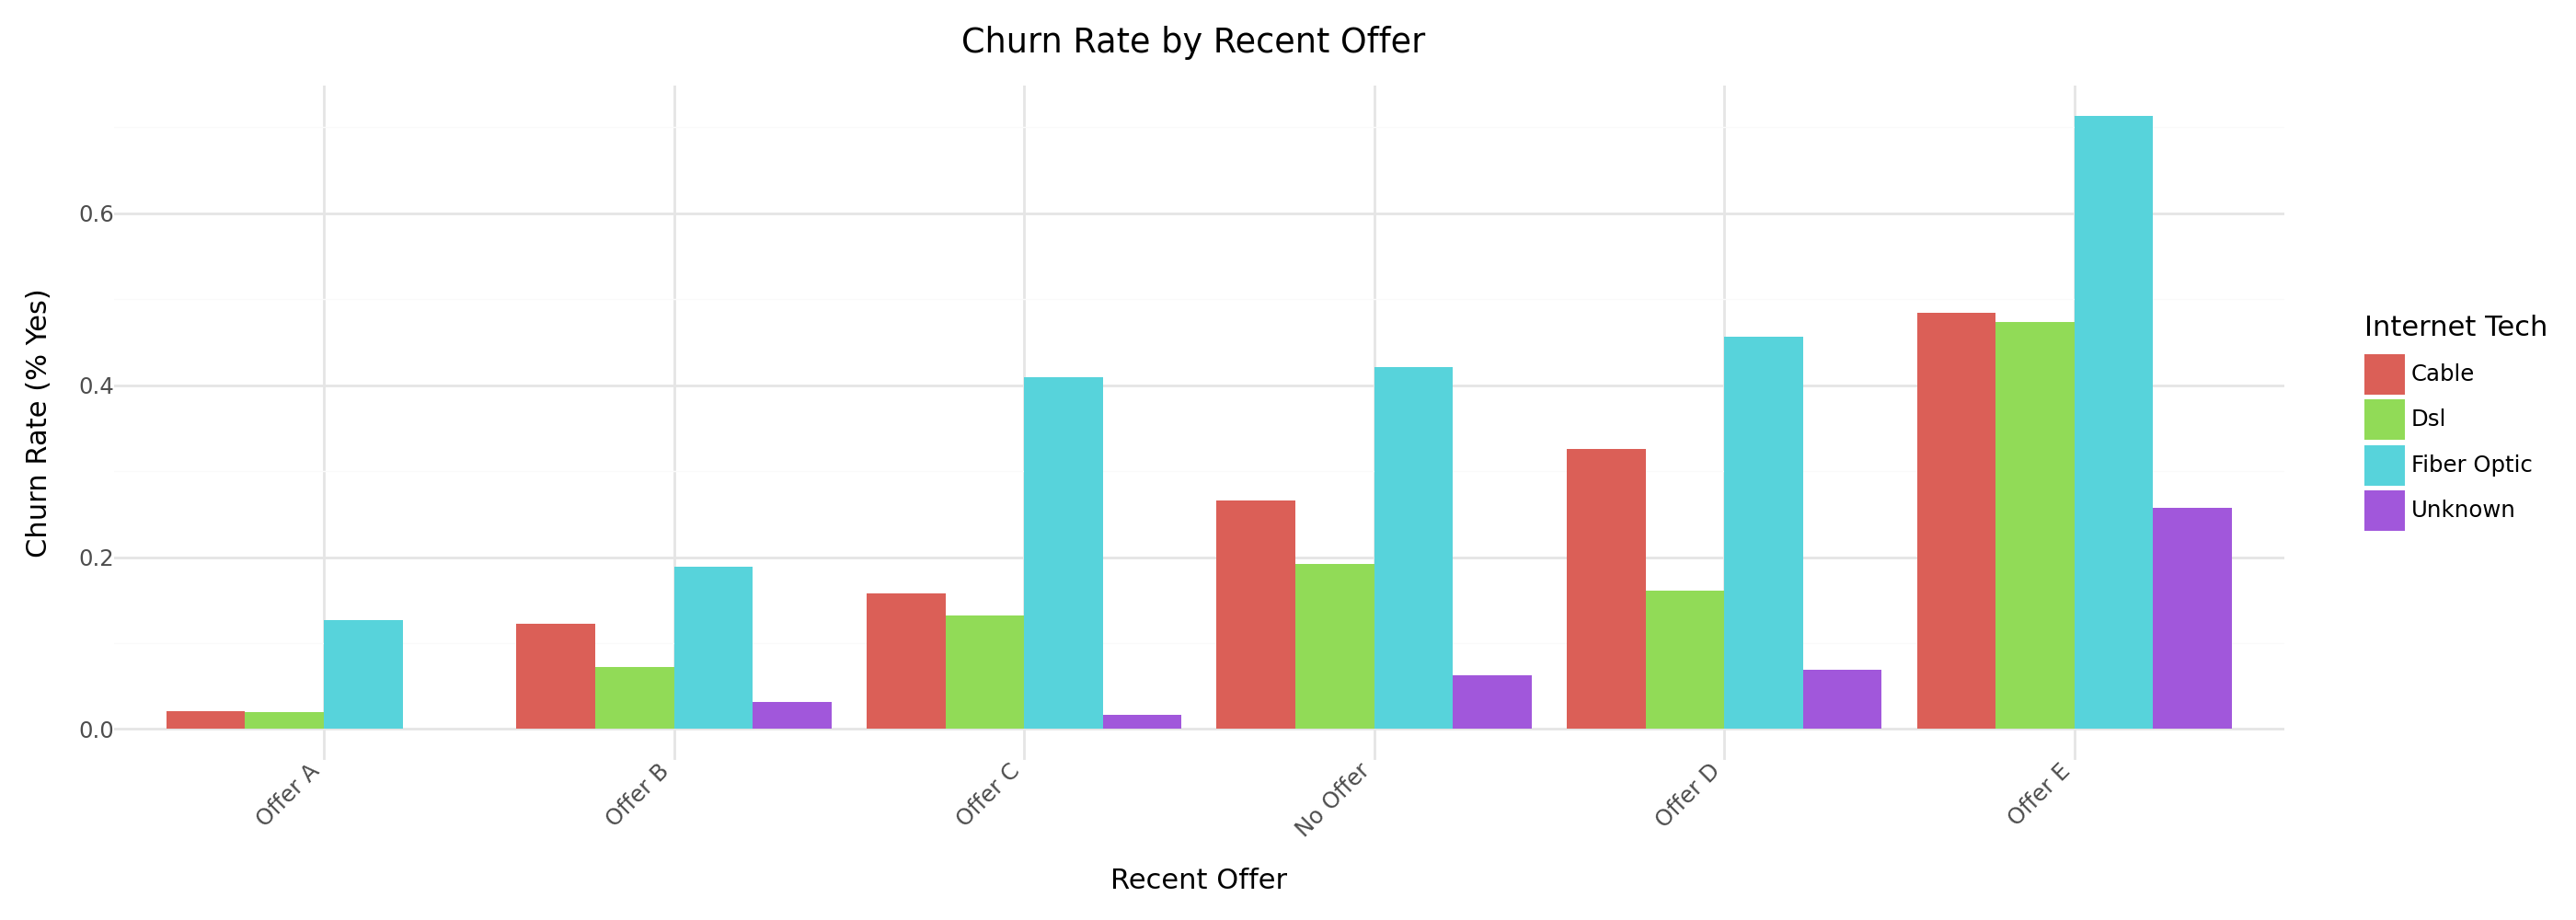

In [ ]:
# Bar chart: Churn rate by Recent Offer x Internet Tech

import pandas as pd
from plotnine import *

# Clean recent_offer
telco_df["recent_offer"] = (
    telco_df["recent_offer"]
    .fillna("Unknown")
    .str.strip()
    .str.title()
)

# Clean internet tech
telco_df["internet_tech"] = (
    telco_df["internet_tech"]
    .fillna("Unknown")
    .str.strip()
    .str.title()
)

# Build churn table
offer_internet_churn = (
    telco_df
    .groupby(["recent_offer", "internet_tech", "left_flag"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

offer_internet_churn["pct_yes"] = (
    offer_internet_churn["Yes"] /
    (offer_internet_churn["Yes"] + offer_internet_churn["No"])
).round(3)

# Order recent_offer by overall churn (ascending)
offer_order = (
    offer_internet_churn
    .groupby("recent_offer", as_index=False)["pct_yes"]
    .mean()
    .sort_values("pct_yes", ascending=True)["recent_offer"]
    .tolist()
)

offer_internet_churn["recent_offer"] = pd.Categorical(
    offer_internet_churn["recent_offer"],
    categories=offer_order,
    ordered=True
)

(
    ggplot(
        offer_internet_churn,
        aes(
            x="recent_offer",
            y="pct_yes",
            fill="internet_tech"
        )
    )
    + geom_col(position="dodge")
    + scale_x_discrete(limits=offer_order)
    + labs(
        title="Churn Rate by Recent Offer ",
        x="Recent Offer",
        y="Churn Rate (% Yes)",
        fill="Internet Tech"
    )
    + theme_minimal()
    + theme(
        figure_size=(14, 5),
        axis_text_x=element_text(rotation=45, ha="right")
    )
)


Purpose: This chart compares churn rates across recent offers, segmented by internet technology, to evaluate which offers are most effective at retaining customers.

So what? Offer E is associated with the highest churn across all internet technologies, particularly among Fiber Optic customers, while Offers A and B consistently show the lowest churn. Fiber Optic customers churn at higher rates overall, suggesting greater sensitivity to pricing or service quality.

Business takeaway: The company should reassess or discontinue Offer E and instead deploy proven low-churn offers earlier, especially for Fiber Optic customers. Tailoring retention strategies by internet technology can reduce churn and improve customer lifetime value.